<a href="https://colab.research.google.com/github/PrajwalNeupane/Hybrid-QNN-Finance/blob/main/encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final state: Statevector([ 0.75740577-0.61877376j, -0.16143532-0.13188695j],
            dims=(2,))
Probability of |1⟩: 0.04345552984384586


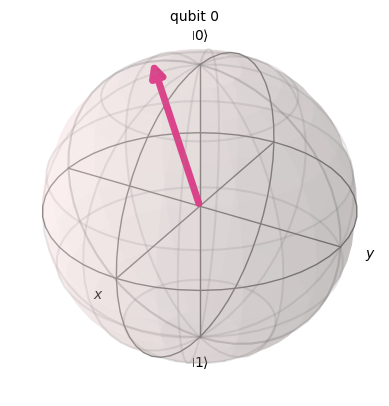

In [4]:
#encoding
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# To encode x_i from classical data into a qc, we take a 1 qubit cirucuit and
# apply rotations weighted by x_i to ensure x_i is represented in the qubit.
# To ensure richness in data, we apply R_y and R_z rotations with angles given
# by theta_i = arcsin(f(x_i)) and phi_i = arccos(g(x_i)) respectively where
# f(x_i) and g(x_i) independently normalize x_i.
#
# In our case,
#f(x_i) = (rsi-50)/(50) => theta_i = arcsin(f(x_i))
#g(x_i) = tanh(MACD) => phi_i = arcsin(g(x_i))

# Apply RY(-0.41) followed by RZ(1.37)
qc.ry(-0.42, 0) # f(30) = -0.4 => theta_i = -0.42
qc.rz(1.37, 0) # g(x_i) = tanh(MACD) = 0.2 = phi_i = 1.37

# Simulate the state
state = Statevector(qc)
print("Final state:", state)
print("Probability of |1⟩:", np.abs(state[1])**2)
state.draw(output='bloch')
